# Exercise 1

## 데이터+라이브러리+결측치제거

In [ ]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3gLj0Q6'

import zipfile
with zipfile.ZipFile('3gLj0Q6', 'r') as existing_zip:
    existing_zip.extractall('data')

import pandas as pd
from sklearn.tree import DecisionTreeRegressor

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

test = test.dropna()
train = train.dropna()

print(train.isnull().sum())

--2023-08-22 08:56:00--  https://bit.ly/3gLj0Q6
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E [following]
--2023-08-22 08:56:00--  https://drive.google.com/uc?export=download&id=1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E
Resolving drive.google.com (drive.google.com)... 173.194.218.102, 173.194.218.139, 173.194.218.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/7j7lq2pg9nj6b6j8lj5gqo5rsklc8p1g/1692694500000/17946651057176172524/*/1or_QN1ksv81DNog6Tu_kWcZ5jJWf5W9E?e=download&uuid=56629782-33e0-4642-9d3f-9f66af88595b [following]
--2023-08-22 08:56:01--  https://doc-0c-10-doc

1. train 데이터중 <br>
(1) 예측해야할 `count` 피쳐를 drop()함수를 사용하고, axis=1 옵션을 사용해 해당 열을 제외한 데이터들을 `X_train` 이라는 이름의 DataFrame 객체로 만들고 <br>
(2) `count` 피쳐만을 데이터로 갖는 `Y_train` 이라는 이름의 DataFrame 객체로 만드는 코드를 아래에 작성하세요

In [ ]:
X_train = train.drop(['count'], axis=1)
Y_train = train['count']

2. `model` 변수명으로 모델을 선언하고, fit() 함수를 사용해서, `X_train` 을 input 으로 삼고, `Y_train` 을 output 으로 삼아 모델을 훈련시키는 코드를 아래에 작성하세요

In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

DecisionTreeRegressor()

3. predict() 를 이용해 test data 를 훈련된 모델로 예측한 data 를 생성하고 예측결과 상위 5개를 출력하는 코드를 작성하세요.

In [ ]:
pred = model.predict(test)
pred[:5]

array([106., 164., 121.,  49.,  93.])

# Exercise 2

## 데이터 다운로드
---
아래 셀을 실행시켜 데이터를 colab 에 불러옵니다.
셀 실행은 Ctrl + Enter 를 이용해 실행시킬 수 있습니다.

In [ ]:
# 데이터 다운로드 링크로 데이터를 코랩에 불러옵니다.

!wget 'https://bit.ly/3i4n1QB'

import zipfile
with zipfile.ZipFile('3i4n1QB', 'r') as existing_zip:
    existing_zip.extractall('data')

--2023-08-22 08:56:11--  https://bit.ly/3i4n1QB
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw [following]
--2023-08-22 08:56:11--  https://drive.google.com/uc?export=download&id=1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw
Resolving drive.google.com (drive.google.com)... 173.194.218.102, 173.194.218.139, 173.194.218.100, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/0g108bmuv6nobqdvavit6gccr3se3geh/1692694500000/17946651057176172524/*/1emLrrpFWT8dCoj5BJb12-5QMG2-nruUw?e=download&uuid=73198f97-e187-4d73-870d-70082589159a [following]
--2023-08-22 08:56:12--  https://doc-10-10-doc

In [ ]:
# 라이브러리 불러오기

import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train = pd.read_csv('data/train.csv')

# Scailing
scaler = MinMaxScaler()
scaler.fit(train[['fixed acidity']])
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

# Encoding
encoder = OneHotEncoder()
encoder.fit(train[['type']])
onehot = encoder.transform(train[['type']])
onehot = onehot.toarray()
onehot = pd.DataFrame(onehot)
onehot.columns = encoder.get_feature_names_out()
train = pd.concat([train, onehot], axis = 1)
train = train.drop(columns = ['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Scaled fixed acidity,type_red,type_white
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0.148760,0.0,1.0
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0.413223,1.0,0.0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0.338843,0.0,1.0
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0.264463,0.0,1.0
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0.330579,0.0,1.0


4. sklearn에 model_selection 모듈에서 KFold를 불러와보세요

In [ ]:
from sklearn.model_selection import KFold

5. KFold에 n_splits = 5, shuffle = True, random_state = 0이라는 인자를 추가해 "kf"라는 변수에 저장해보세요

In [ ]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 0)

6. 반복문을 통해서 1번부터 5번까지의 데이터에 접근해보세요

In [ ]:
for train_idx, valid_idx in kf.split(train) :
  train_data = train.iloc[train_idx]
  valid_data = train.iloc[valid_idx]

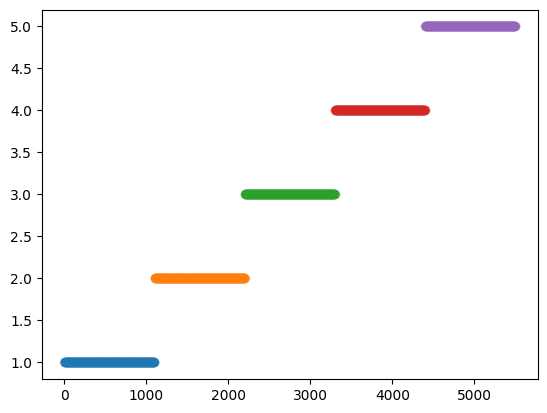

In [ ]:
# 이 코드는 순서대로 이해하려 해보세요 :) (문제와 상관없는 추가코드입니다.)

import matplotlib.pyplot as plt


kf = KFold(n_splits = 5, shuffle = False)
train_idx_store = []
valid_idx_store = []

i = 1
for train_idx, valid_idx in kf.split(train) :
  plt.scatter(valid_idx, [i for x in range(len(valid_idx))], alpha = 0.1)
  i += 1
plt.show()


## 아래의 이미지는 shuffle = False로 했을 때, 데이터가 겹치지 않게 순서대로 쪼개지는 것을 볼 수 있습니다.